# Linear Regression

Parts of project for linear regression:
## 1 Input, output parameters [x_train, y_train]
#### x_train and y_train as numpy vectors of m-values
We will create 4 dots as data points for our model

## 2 Model of linear regression
#### straight line function: $f(x) = y = w.x + b$
Where:
    x and y are our data of model<br>
    w and b are parameters of model

## 3 Cost function
#### Mean squared error as cost function
Cost function:  $J(w, b) = 1/2m.sum(f(x)-y)^2$ <br>
                $J(w, b) = 1/2m.sum((w.x + b)-y)^2$
                
## 4 Gradient Descent algorithm
#### Algorithm to minimize cost function
Is based on searching derivation of cost function based on model parameters w and b:<br>
$w = w - alpha.dJ_dw ( J ( w, b ) )$<br>
$b = b - alpha.dJ_db ( ( J ( w, b ) )$

$w = w - alpha.dJ_dw(1/2m.sum((w.x + b)-y)^2)$<br>
$b = b - alpha.dJ_db(1/2m.sum((w.x + b)-y)^2)$

$dJ_dw(J(w, b)) = 1/m.sum(((w.x + b)-y).x)$<br>
$dJ_db(J(w, b)) = 1/m.sum((w.x + b)-y)$

..so final gradient descent for w and b is:

$w = w - alpha.1/m.sum(((w.x + b)-y).x)$<br>
$b = b - alpha.1/m.sum((w.x + b)-y)$

Where:
    alpha is step, used to do small changes in each loop

## 5 Training
#### Searching the best parameters of w and b to find straight line function which is closest to all data points
Means that we run gradient descent algorithm in a loop (e.g. 1000 times) with alpha set as some small number (e.g. 0.001)<br>
When we run the gradient descent algorithm in many steps, the parameters w and b are changing its value to do the best - looks for local minima of cost function J(w, b)
## 6 Visualization
Using matplotlib to visualize our input data, straight line function, progress of cost function in training process and animation - how is our straight line changing itself during training

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from IPython.display import display
import copy

Create our input parameters x_train and y_train as numpy vectors

In [3]:
x_train = np.array([56, 48, 66, 72])
y_train = np.array([130000, 118000, 145000, 180000])

Get number of dots of our data from x_train parameter using numpy function .shape[]

In [4]:
m = x_train.shape[0]
print(f'Count of data points: {m}')

Count of data points: 4


Draw whole data points using matplotlib and scatter plot:

Text(0, 0.5, 'Price')

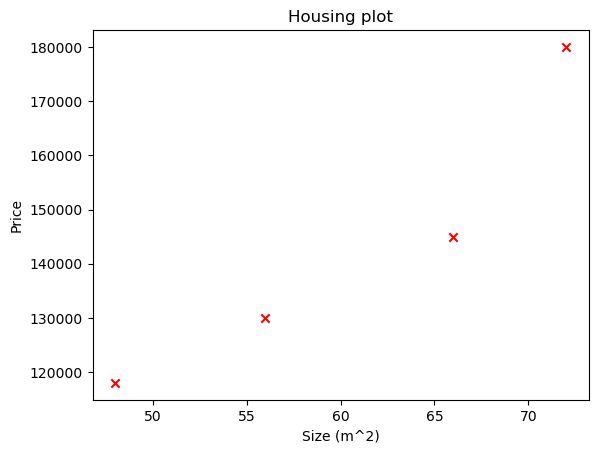

In [5]:
plt.scatter(x_train, y_train, marker='x', color='r')
plt.title('Housing plot')
plt.xlabel('Size (m^2)')
plt.ylabel('Price')

# Straight line function:
$f(x) = w.x + b$

In [6]:
# in this step we will guess the parameters of model (e.g. 800 and 10000)

w = 800
b = 10000

# create an empty numpy vector with the same length as input data
f_wb = np.zeros(m)

# calculate and fill our straight line model with our input data points

for i in range(m):
    f_wb[i] = w * x_train[i] + b

print(f_wb)

[54800. 48400. 62800. 67600.]


Let's draw our straight line and datapoints together in one chart

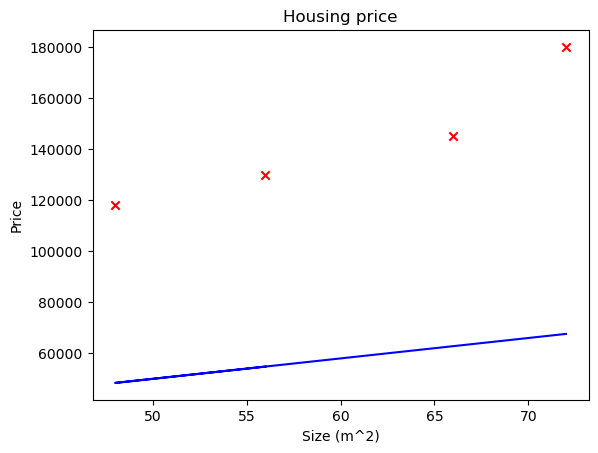

In [7]:
plt.scatter(x_train, y_train, marker='x', color='r')
plt.title('Housing price')
plt.xlabel('Size (m^2)')
plt.ylabel('Price')

plt.plot(x_train, f_wb, label='Our Prediction', color='b')

# Cost function

Mean squared error as cost function:
<br>  
$J(w, b) = 1/2m.sum(f(x)-y)^2$
<br>
$J(w, b) = 1/2m.sum((w.x + b)-y)^2$

In [8]:
def compute_cost(x, y, w, b): 
    """
    Calculates cost function of given model parameters w and b
    
    Arguments:
        x (ndarray (m,)): Input data, m - size of vector 
        y (ndarray (m,)): Target data points, m - size of vector
        w,b (scalar)    : Model Parameters w and b  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
            to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

Now we can compute the cost of our guessed model, to see how wrong we are:

In [9]:
w = 800
b = 10000

cost = compute_cost(x_train, y_train, w, b)
print(f'Cost of our guessed model is {cost}')

Cost of our guessed model is -21871384.0


# Gradiend Descent

This function compute_gradient_descent is derivative part of gradient descent algorithm to minimize cost function:

#### Algorithm to minimize cost function
Is based on finding derivation of cost function based on model parameters w and b:<br>
$w = w - alpha.dJ_dw ( J ( w, b ) )$<br>
$b = b - alpha.dJ_db((J(w, b))$

$w = w - alpha.dJ_dw(1/2m.sum((w.x + b)-y)^2)$<br>
$b = b - alpha.dJ_db(1/2m.sum((w.x + b)-y)^2)$

$dJ_dw(J(w, b)) = 1/m.sum(((w.x + b)-y).x)$<br>
$dJ_db(J(w, b)) = 1/m.sum((w.x + b)-y)$

..so final gradient descent for w and b is:

$w = w - alpha.1/m.sum(((w.x + b)-y).x)$<br>
$b = b - alpha.1/m.sum((w.x + b)-y)$

 


In [10]:
def compute_gradient_descent(x, y, w, b):
    """
    Calculates derivation for each input x,y parameter of given model parameters w and b
    Sums calculated derivations
    Divides result with 'm' as count of input parameters
    
    Arguments:
          x (ndarray (m,))  : Input data, m - size of vector 
          y (ndarray (m,))  : Target data points, m - size of vector
          w (scalar)        : Model Parameters w
          b (scalar)        : Model Parameters b
    
    Returns
        (dJ_dW (float), dJ_db (float)): (tuple) derivation part of gradient descent algorithm of parameter w and b
    """
    
    m = x.shape[0]
    dJ_dw = 0
    dJ_db = 0
    
    for i in range(m):
        f_x = w * x[i] + b
        dJ_dw_i = (f_x - y[i]) * x[i]
        dJ_db_i  = (f_x - y[i])
        dJ_dw += dJ_dw_i
        dJ_db += dJ_db_i
    dJ_dw = dJ_dw / m
    dJ_db = dJ_db / m
    
    return dJ_dw, dJ_db        

# Training
Searching for best model parameters - running gradient descent and re-set <i><u>w</u></i> and <i><u>b</u></i> with small steps of size = alpha, for better results 

In [11]:
# initialize model of some numbers
w_init = 800
b_init = 10000

# define count of iterations and alpha parameters
iterations = 1000
alpha = 1.0e-6

# avoid modifying global array 
w = copy.deepcopy(w_init)
b = copy.deepcopy(b_init)

# arrays to store cost values and model parameters (w and b) in all steps of training - to future visualization
cost_history = []
model_parameters_history = []

# run training
for i in range(iterations):
    # calculate:
    #     dJ_dw(J(w, b)) = 1/m.sum(((w.x + b)-y).x)
    #     dJ_db(J(w, b)) = 1/m.sum((w.x + b)-y)
    dj_dw, dj_db = compute_gradient_descent(x_train, y_train, w, b )
    
    # calculate:
    #     w = w - alpha.dJ_dw(J(w, b))
    #     b = b - alpha.dJ_db(J(w, b))
    w = w - alpha*dj_dw
    b = b - alpha*dj_db
    
    # save all values in to array for future visualization
    cost_history.append(compute_cost(x_train, y_train, w, b))
    model_parameters_history.append([w, b])
    
print("The cost / error of best model is: {:.2f}".format(cost_history[-1]))
print("The best model parameters: w: {:.2f}, b: {:.2f}".format(model_parameters_history[-1][0], model_parameters_history[-1][1]))

The cost / error of best model is: 33786973.81
The best model parameters: w: 2173.21, b: 10021.94


# Plot the history of cost function and history of model parameters <u>w</u> and <u>b</u>

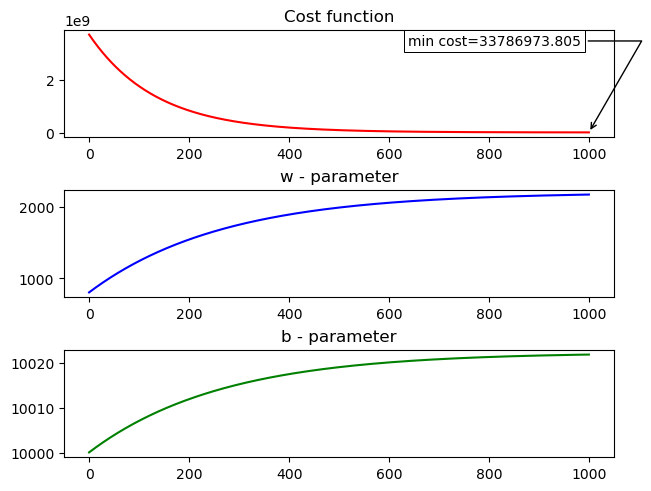

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, constrained_layout=True)
ax1.plot(cost_history, color='red')
ax1.set_title('Cost function')
w_parameter = [x[0] for x in model_parameters_history]
ax2.plot(w_parameter, color='blue') 
ax2.set_title('w - parameter')
b_parameter = [x[1] for x in model_parameters_history]
ax3.plot(b_parameter, color='green')
ax3.set_title('b - parameter')

def annot_max(x,y, ax=None):
    x_min = x[np.argmin(y)]
    y_min = y.min()
    text = "min cost={:.3f}".format(y_min)
    if not ax:
        ax = plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops = dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(x_min, y_min), xytext=(0.94,0.96), **kw)

annot_max(np.arange(len(cost_history)),np.array(cost_history),ax1)

# Plot the best result 
best = last item from array of model_parameters_history <br>
To see how the result straight line function (as results of training) fits the datapoints

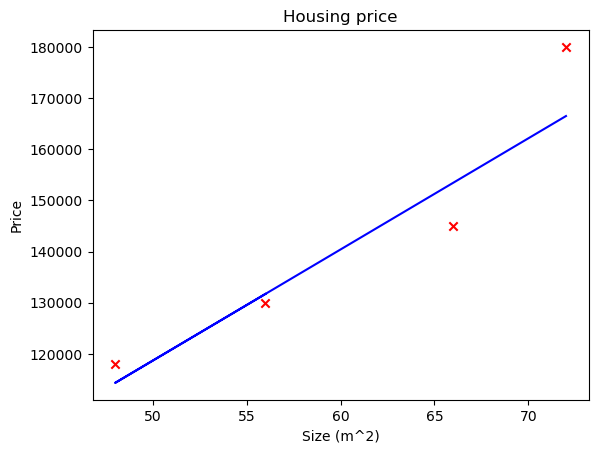

In [13]:
# get best = last results of model from training process
best_model = model_parameters_history[-1]
best_w = best_model[0]
best_b = best_model[1]

m = x_train.shape[0]

f_wb = np.zeros(m)

for i in range(m):
    f_wb[i] = best_w * x_train[i] + best_b

plt.scatter(x_train, y_train, marker='x', color='r')
plt.title('Housing price')
plt.xlabel('Size (m^2)')
plt.ylabel('Price')

plt.plot(x_train, f_wb, label='Our Prediction', color='b')

# Plot animated chart - progress of training model
This plot is interactive and shows how the straight line changed itself during training from step 0 to final step :)

Generating of animation takes some time. Be patient..


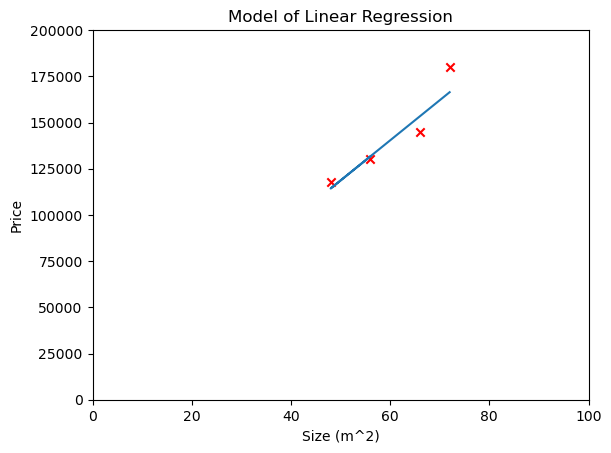

In [14]:
m = x_train.shape[0]

# for faster generation of result, we will get only each 10-th step from all 1000 iterations
partial_model_parameters = model_parameters_history[::10]

model_progress = []

# calculate function of straight line of each model in partial_model_parameters
for w, b in partial_model_parameters:
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x_train[i] + b
    model_progress.append(f_wb)

fig, ax = plt.subplots()

line, = ax.plot([], [], lw=2)

ax.set_xlim(np.min(x_train), np.max(x_train))
ax.set_ylim(np.min(y_train), np.max(y_train))

ax.set_xlim(0, 100)
ax.set_ylim(0, 200000)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    ax.clear()
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 200000)
    plt.scatter(x_train, y_train, marker='x', color='r')
    plt.title('Model of Linear Regression')
    plt.xlabel('Size (m^2)')
    plt.ylabel('Price')
    line, = ax.plot(x_train, model_progress[i])
    return line,

print('Generating of animation takes some time. Be patient..')
ani = animation.FuncAnimation(
    fig, animate, frames=len(model_progress), init_func=init, blit=True)

ani.save('images/base_of_linear_regression.gif', writer='pillow', fps=30)

display(HTML(ani.to_jshtml()))


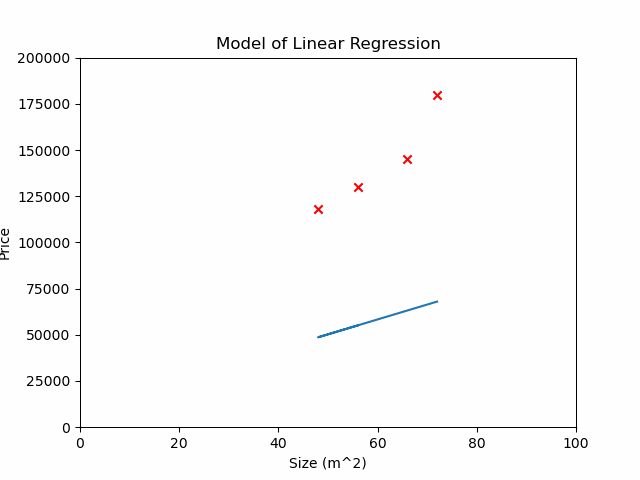

In [15]:
#If you are displaying this notebook in GitHub, you probably don't see the beautiful animation so here is function to display generated GIF:

from utils import show_gif
show_gif('images/base_of_linear_regression.gif')